In [1]:
%env CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt


env: CURL_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt


In [2]:
!ls *.geojson

delaware_river_basin.geojson


In [3]:
my_aoi_file = 'delaware_river_basin.geojson'

In [4]:
from notebookLib.nb_display import Ldisplay
ld = Ldisplay()
ld.map_geojson(my_aoi_file)

creating Ldisplay class


In [21]:
import json 

with open(my_aoi_file) as f:
    data = json.load(f)
    
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-77.23388671874999, 37.38761749978395],
      [-73.85009765625, 37.38761749978395],
      [-73.85009765625, 43.11702412135048],
      [-77.23388671874999, 43.11702412135048],
      [-77.23388671874999, 37.38761749978395]]]}}]}

In [22]:
coord = data['features'][0]['geometry']['coordinates']

x1 = coord[0][0][0]
y1 = coord[0][0][1]
x2 = coord[0][2][0]
y2 = coord[0][2][1]


x1,y1,x2,y2



(-77.23388671874999, 37.38761749978395, -73.85009765625, 43.11702412135048)

In [23]:
%%bash

my_tif=/vsis3/ga-et-data/MODIS_NDVI/2016/2016001.1_km_16_days_NDVI.tif
rio info $my_tif --indent 2

{
  "blockxsize": 128,
  "blockysize": 128,
  "bounds": [
    -155.57238265799998,
    20.001584242744208,
    -52.209115508187494,
    49.999999996000085
  ],
  "colorinterp": [
    "gray"
  ],
  "count": 1,
  "crs": "EPSG:4326",
  "descriptions": [
    null
  ],
  "driver": "GTiff",
  "dtype": "float32",
  "height": 3108,
  "indexes": [
    1
  ],
  "interleave": "band",
  "lnglat": [
    -103.89074908309374,
    35.00079211937215
  ],
  "mask_flags": [
    [
      "nodata"
    ]
  ],
  "nodata": -3.4028234663852886e+38,
  "res": [
    0.00965199992061,
    0.00965199992061
  ],
  "shape": [
    3108,
    10709
  ],
  "tiled": true,
  "transform": [
    0.00965199992061,
    0.0,
    -155.57238265799998,
    0.0,
    -0.00965199992061,
    49.999999996000085,
    0.0,
    0.0,
    1.0
  ],
  "units": [
    null
  ],
  "width": 10709
}


In [24]:
%%bash

window="'-77.23388671874999, 37.38761749978395, -73.85009765625, 43.11702412135048'"
my_tif=/vsis3/ga-et-data/MODIS_NDVI/2016/2016001.1_km_16_days_NDVI.tif
echo $window
echo rio clip $my_tif delaware.tif --bounds ${window}

'-77.23388671874999, 37.38761749978395, -73.85009765625, 43.11702412135048'
rio clip /vsis3/ga-et-data/MODIS_NDVI/2016/2016001.1_km_16_days_NDVI.tif delaware.tif --bounds '-77.23388671874999, 37.38761749978395, -73.85009765625, 43.11702412135048'


In [38]:
!rio clip /vsis3/ga-et-data/MODIS_NDVI/2016/2016001.1_km_16_days_NDVI.tif \
   delaware.tif --overwrite --bounds '-77.23388671874999, 37.38761749978395, -73.85009765625, 43.11702412135048' 



In [39]:
!gdalinfo delaware.tif

Driver: GTiff/GeoTIFF
Files: delaware.tif
Size is 351, 594
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-77.233886718749986,43.117024121350482)
Pixel Size = (0.009651999920610,-0.009651999920610)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -77.2338867,  43.1170241) ( 77d14' 1.99"W, 43d 7' 1.29"N)
Lower Left  ( -77.2338867,  37.3837362) ( 77d14' 1.99"W, 37d23' 1.45"N)
Upper Right ( -73.8460347,  43.1170241) ( 73d50'45.73"W, 43d 7' 1.29"N)
Lower Right ( -73.8460347,  37.3837362) ( 73d50'45.73"W, 37d23' 1.45"N)
Center      ( -75.5399607,  40.2503801) ( 75d32'23.86"W, 40d15' 1.37"N)
Band 1 Block=128x128 Type=Float32, ColorInterp=Gray
  NoData Value=-3.4028234663852886e+38


In [40]:
import rasterio

tif_file = 'delaware.tif'

with rasterio.open(tif_file) as src:
    myThumb = src.read(1)

In [41]:
# cleanup nodata
myThumb.max()


0.9866

In [42]:
myThumb.min()


-3.4028235e+38

In [43]:
import numpy as np
a = myThumb
a[(a < 0) | (a > 1)] = np.nan


In [44]:
delaware_array = (a * 100).astype(np.uint8)

In [45]:
delaware_array

array([[41, 49, 37, ..., 50, 29, 36],
       [38, 25, 15, ..., 30, 43, 43],
       [32, 27, 35, ..., 50, 51, 43],
       ...,
       [56, 54, 57, ...,  0,  0,  0],
       [60, 64, 56, ...,  0,  0,  0],
       [59, 60, 61, ...,  0,  0,  0]], dtype=uint8)

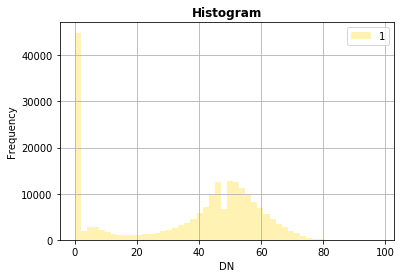

In [46]:
from rasterio.plot import show_hist
show_hist(delaware_array, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [47]:
delaware_array.shape

(594, 351)

In [48]:
import matplotlib.pyplot as plt
import matplotlib as mpl

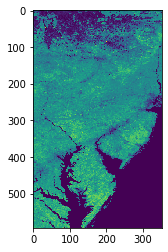

In [49]:
plt.imshow(delaware_array);  # Visualize a basic plot of the scaled EVI data

In [50]:
vmin = delaware_array.min()

In [51]:
vmax = delaware_array.max()

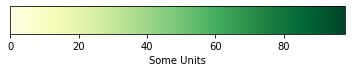

In [52]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.YlGn
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Some Units')
fig.show()

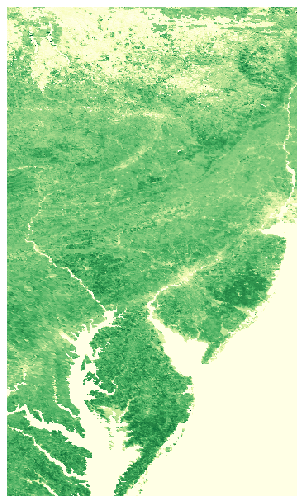

In [53]:
EVIDisplay=delaware_array
plt.figure(figsize = (8,9))    # Set the figure size (x,y)
plt.axis('off')                   # Remove the axes' values

# Plot the array, using a colormap and setting a custom linear stretch based on the min/max EVI values
plt.imshow(EVIDisplay, vmin = np.nanmin(EVIDisplay), vmax = np.nanmax(EVIDisplay), cmap = 'YlGn');